In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Simple simulation for free fall

In [2]:
g = -9.81
y = 0.0
v = 0.0

t = 0
dt = 0.01

data = []

while t < 10:
    y += v*dt
    v += g*dt
    data.append([t, y, v]) 
    t += dt

data = np.array(data) 

In [3]:
data.shape

(1001, 3)

In [4]:
data = data.transpose()
data.shape  # t, y, v

(3, 1001)

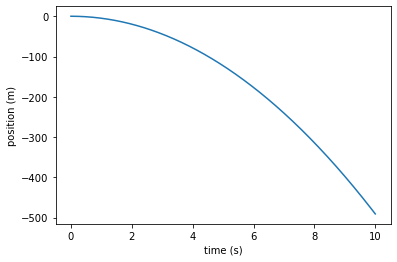

In [5]:
plt.plot(data[0], data[1])
plt.xlabel("time (s)")
plt.ylabel("position (m)");

## Simple simulation for bouncing
Add a floor at 𝑦=−5.

In [6]:
g = -9.81
y = 0.0
v = 0.0

t = 0
dt = 0.01

y_floor = -5

data = []

while t < 10:
    y += v*dt
    if y > y_floor:
        v += g*dt
    else:
        v = -v   # bounce off floor
    data.append([t, y, v]) 
    t += dt

data = np.array(data).transpose()

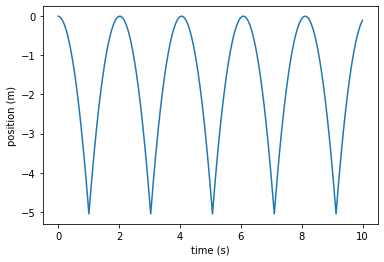

In [7]:
plt.plot(data[0], data[1])
plt.xlabel("time (s)")
plt.ylabel("position (m)");

What happens at the floor? – The velocity changes (elastic collision).

# Experiments
For the purpose of the next experiments, let's make a function to produce them.

In [8]:
def bouncingBall(g: 'gravity value of g(m/s2)',
                 y: 'vertical position',
                 v: 'velocity',
                 t: 'time',
                 dt: 'time step',
                 y_floor: 'floor position',
                 e: 'Coefficient of restitution',
                 interval: 'time interval',
                 title: 'name of experiment'):    
   
    data = []
    
    while t < interval:
        y += v*dt
        if y > y_floor:
            v += g*dt
        else:
            v=-e*v # bounce off floor with Coefficient of restitution - COR 
        data.append([t, y, v]) 
        t += dt
    
    data = np.array(data).transpose()
    plt.plot(data[0], data[1])
    plt.title(title)
    plt.xlabel("time (s)")
    plt.ylabel("position (m)")

Let's check our function:

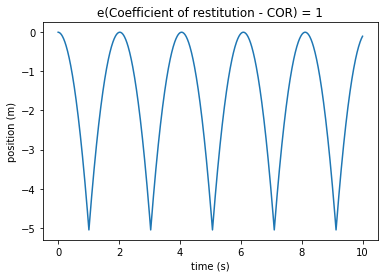

In [9]:
bouncingBall(-9.81, 0, 0, 0, 0.01, -5, 1, 10, "e(Coefficient of restitution - COR) = 1")

It looks like it works properly. Once we have submitted a Coefficient of Restitution = 1 (This is a perfectly elastic collision, in which no kinetic energy is dissipated, and the objects rebound from one another with the same relative speed with which they approached.), the result is as it was until now.

Let's try with  e=0  - perfectly inelastic collision:

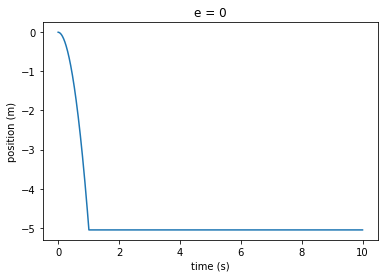

In [10]:
bouncingBall(-9.81, 0, 0, 0, 0.01, -5, 0, 10, "e = 0")

OMG!!! What a huge steel ball we throw? There is no bounce!

What would happen if we try with  e>1  - collision in which energy is released:

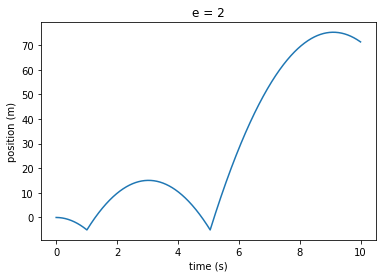

In [11]:
bouncingBall(-9.81, 0, 0, 0, 0.01, -5, 2, 10, "e = 2")

WOW!!! How much time we will need to get to Saturn for example? :)

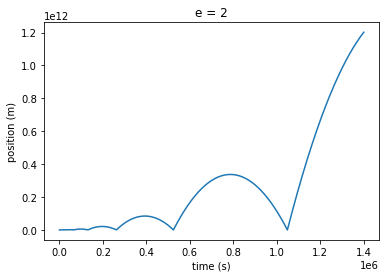

In [12]:
bouncingBall(-9.81, 0, 0, 0, 1, -5, 2, 1400000, "e = 2")

Less then 16 days ;). In this experiment we increase time step to compute result faster. Let's bear in mind that by moving away from the planet earth the value of g(m / s2) decreases drastically, so we might get faster (I'm not sure for this assumption :))!

And now we try with a few real world subjects - sports balls bounced off a steel surface:

1. Cricket Ball - Coefficient of restitution = from 0.615 to 0.606 approx 0.61

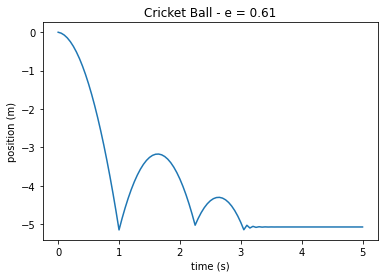

In [13]:
bouncingBall(-9.81, 0, 0, 0, 0.05, -5, 0.61, 5, "Cricket Ball - e = 0.61")


2. Hockey Ball - Coefficient of restitution = from 0.647 to 0.628 approx 0.636



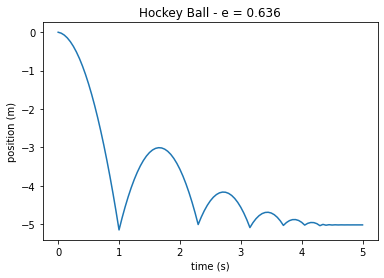

In [14]:
bouncingBall(-9.81, 0, 0, 0, 0.05, -5, 0.636, 5, "Hockey Ball - e = 0.636")

3. Table Tennis Ball - Coefficient of restitution = from 0.809 to 0.779 approx 0.794



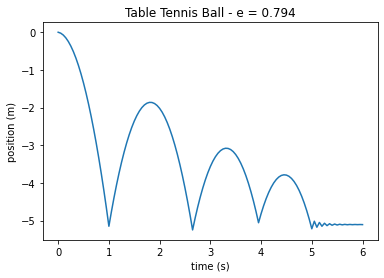

In [15]:
bouncingBall(-9.81, 0, 0, 0, 0.05, -5, 0.794, 6, "Table Tennis Ball - e = 0.794")

4. Golf Ball - Coefficient of restitution = from 0.897 to 0.889 approx 0.893



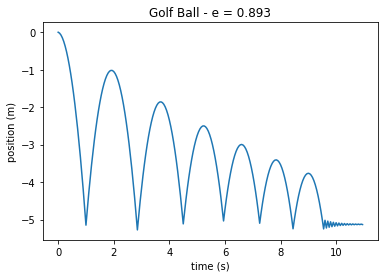

In [16]:
bouncingBall(-9.81, 0, 0, 0, 0.05, -5, 0.893, 11, "Golf Ball - e = 0.893")

5. Basket Ball - Coefficient of restitution = from 0.546 to 0.566 approx 0.546

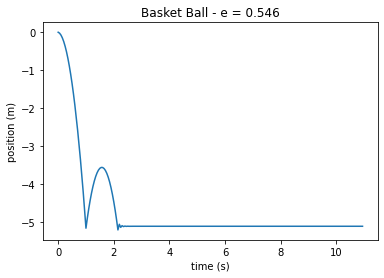

In [18]:
bouncingBall(-9.81, 0, 0, 0, 0.05, -5, 0.546, 11, "Basket Ball - e = 0.546")